# **Project Description**

In the fast-paced and highly competitive world of professional basketball, success is based upon a multitude of factors, from individual player performance to team dynamics. Some of these factors, like True Shooting Percentage (TS%) is a critical metric that offers insights into a player's efficiency of scoring points. You can think of true shooting percentage as assessing how well a player performs any time one of his possessions ends in a shot attempt. TS% considers not just field goals, but also free throws and three-pointers, providing a comprehensive measure of a player's offensive contribution. The problem at hand revolves around predicting Player’s TS% for the upcoming season, a task that holds significant implications for team management and strategy. Every year there is a chance to make the team better and TS% is one of those advanced metrics where it can impact your team’s chances of winning. A team can get a steal in trades, roster rotations, and free agency if they can accurately look at a player’s TS%. There is a huge importance of accurately depicting a player’s TS%. One thing about TS% is that it serves as a key indicator of offensive prowess, directly impacting a team's ability to outscore opponents and secure victories on the court. In essence, the ability to predict TS% empowers teams to optimize their offensive strategies and enhance their chances of success in the highly competitive NBA environment.
The data analytics problem that I am analyzing is focused on leveraging historical NBA player statistics and advanced metrics to predict True Shooting Percentage for the upcoming season. There are a lot of metrics out there that are important, but in terms of evaluating a player’s offensive ability to score the ball, I think TS% takes the lead. The goal is to provide valuable insights for NBA teams seeking to optimize their rosters and elevate their competitive edge. With the accurate TS% predictions from the Machine learning model, it can help teams identify players poised to make significant offensive contributions, enabling them to make informed decisions that align with their strategic objectives and increase their chances of success on the court. This is a key metric in evaluating players’ performance. It will help the organization compare players’ strengths and weaknesses and truly assess if the player is hurting or helping the team succeed on the court.


# **Data Ingestion**

In [ ]:
#import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

fp = "/content/drive/MyDrive/NBA Stats 202223 All Stats  NBA Player Props Tool.csv"
df = pd.read_csv(fp)



In [ ]:
# Drop the 'Rank' column
df = df.drop(['RANK'],axis=1)

In [ ]:
#See if data got loaded properly

df.head()

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,Joel Embiid,Phi,C-F,29.1,66,34.6,37.0,14.5,771,0.857,...,4.2,1.0,1.7,3.4,43.2,37.2,47.4,13.0,124.4,104.1
1,Luka Doncic,Dal,F-G,24.1,66,36.2,37.7,14.0,694,0.742,...,8.0,1.4,0.5,3.6,41.0,40.4,49.0,14.4,120.0,109.2
2,Damian Lillard,Por,G,32.7,58,36.3,33.8,13.7,558,0.914,...,7.3,0.9,0.3,3.3,36.9,39.5,44.3,11.5,126.4,117.6
3,Shai Gilgeous-Alexander,Okc,G-F,24.7,68,35.5,32.8,12.2,739,0.905,...,5.5,1.6,1.0,2.8,36.2,36.9,41.7,10.6,124.9,109.8
4,Giannis Antetokounmpo,Mil,F,28.3,63,32.1,38.8,16.2,772,0.645,...,5.7,0.8,0.8,3.9,42.9,36.8,48.6,15.9,116.8,100.6


In [ ]:
#Confirm end of data loaded properly

df.tail()

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
604,Michael Foster Jr.,Phi,F,20.2,1,1.0,0.0,NaN,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
605,Frank Jackson,Uta,G,24.9,1,5.1,24.6,0.0,0,0.0,...,1.0,0.0,0.0,0.0,2.0,1.0,3.0,0.0,48.0,120.2
606,Alondes Williams,Bro,G,23.8,1,5.3,16.7,100.0,0,0.0,...,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,NaN,97.7
607,Jamaree Bouyea,Was,G,23.8,1,5.5,7.9,0.0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,99.9
608,Moses Brown,Bro,C,23.5,2,3.2,6.9,100.0,0,0.0,...,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,NaN,NaN


In [ ]:
#Get info about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NAME    609 non-null    object 
 1   TEAM    609 non-null    object 
 2   POS     609 non-null    object 
 3   AGE     609 non-null    float64
 4   GP      609 non-null    int64  
 5   MPG     609 non-null    float64
 6   USG%    609 non-null    float64
 7   TO%     608 non-null    float64
 8   FTA     609 non-null    int64  
 9   FT%     609 non-null    float64
 10  2PA     609 non-null    int64  
 11  2P%     609 non-null    float64
 12  3PA     609 non-null    int64  
 13  3P%     609 non-null    float64
 14  eFG%    606 non-null    float64
 15  TS%     606 non-null    float64
 16  PPG     609 non-null    float64
 17  RPG     609 non-null    float64
 18  APG     609 non-null    float64
 19  SPG     609 non-null    float64
 20  BPG     609 non-null    float64
 21  TPG     609 non-null    float64
 22  P+

In [ ]:
#find nulls in dataset

df.isnull().sum()

NAME      0
TEAM      0
POS       0
AGE       0
GP        0
MPG       0
USG%      0
TO%       1
FTA       0
FT%       0
2PA       0
2P%       0
3PA       0
3P%       0
eFG%      3
TS%       3
PPG       0
RPG       0
APG       0
SPG       0
BPG       0
TPG       0
P+R       0
P+A       0
P+R+A     0
VI        0
ORtg     24
DRtg     23
dtype: int64

In [ ]:
rows_with_null = df[df['ORtg'].isnull() | df['DRtg'].isnull()]
rows_with_null

#The player's below dont have an ORtg or a DRtg due to their lack of Games played and MPG. ORtg and DRtg is based off per 100 posessions.
#Therefore, these stats can stay for now.

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
509,Tyler Dorsey,Dal,G,27.2,3,2.8,27.2,0.0,0,0.000,...,0.0,0.0,0.0,0.0,3.7,3.0,3.7,0.0,NaN,NaN
551,Justin Champagnie,Tor,G-F,21.8,3,3.6,11.7,0.0,0,0.000,...,0.3,0.0,0.0,0.0,3.3,2.3,3.7,10.2,NaN,NaN
552,A.J. Lawson,Min,G,22.7,1,1.8,23.8,0.0,0,0.000,...,0.0,0.0,0.0,0.0,3.0,2.0,3.0,0.0,NaN,NaN
553,Chris Silva,Dal,F,26.6,1,3.0,30.2,50.0,0,0.000,...,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,NaN,NaN
554,Stanley Umude,Det,G,24.0,1,2.1,38.1,0.0,2,1.000,...,0.0,1.0,1.0,0.0,2.0,2.0,2.0,0.0,NaN,NaN
556,Donovan Williams,Atl,G,21.6,2,2.2,48.8,0.0,0,0.000,...,0.0,0.0,0.0,0.0,3.0,2.0,3.0,0.0,NaN,NaN
564,Dylan Windler,Cle,G-F,26.5,3,3.5,17.2,25.0,0,0.000,...,0.3,0.3,0.0,0.3,1.7,2.0,2.0,0.0,NaN,NaN
566,Tony Bradley,Chi,C-F,25.3,12,2.8,19.6,7.4,4,1.000,...,0.1,0.1,0.1,0.1,2.5,1.7,2.6,7.5,NaN,NaN
568,Svi Mykhailiuk,Nyk,G-F,25.8,13,3.1,17.4,14.0,5,0.600,...,0.1,0.1,0.0,0.2,2.2,1.7,2.2,5.6,NaN,NaN
573,Jordan Schakel,Was,G,24.8,2,3.1,14.0,0.0,0,0.000,...,0.5,0.5,0.0,0.0,1.5,2.0,2.0,0.0,NaN,NaN


In [ ]:
#Find different Descriptive statistics about the data.
df.describe()

,AGE,GP,MPG,USG%,TO%,FTA,FT%,2PA,2P%,3PA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
count,609.000000,609.000000,609.000000,609.000000,608.000000,609.000000,609.000000,609.000000,609.000000,609.000000,...,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,585.000000,586.000000
mean,26.587849,42.500821,19.557307,18.373071,13.736678,95.042693,0.708874,218.479475,0.528266,138.195402,...,2.032020,0.604105,0.374713,1.080952,12.436125,10.980624,14.466831,6.947947,112.970085,108.668942
std,4.334817,25.087093,9.562195,5.794763,8.229658,123.980148,0.229161,242.043527,0.152410,152.035465,...,1.918867,0.399341,0.376249,0.816039,8.423154,8.249136,9.845324,2.409998,14.309695,5.205883
min,19.400000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.600000
25%,23.500000,21.000000,12.100000,14.300000,10.075000,13.000000,0.667000,37.000000,0.483000,14.000000,...,0.800000,0.300000,0.100000,0.500000,6.200000,4.900000,7.200000,5.700000,106.300000,105.300000
50%,25.800000,43.000000,19.100000,17.700000,13.000000,45.000000,0.760000,120.000000,0.538000,86.000000,...,1.300000,0.600000,0.300000,0.900000,10.300000,8.700000,11.800000,7.000000,114.100000,109.100000
75%,29.600000,65.000000,27.900000,21.300000,16.400000,129.000000,0.841000,326.000000,0.594000,216.000000,...,2.700000,0.800000,0.500000,1.500000,16.800000,14.700000,19.600000,8.200000,120.200000,112.100000
max,42.800000,82.000000,40.800000,48.800000,100.000000,772.000000,1.000000,1213.000000,1.000000,731.000000,...,10.700000,3.000000,3.000000,4.100000,43.200000,40.400000,49.000000,16.800000,174.800000,126.400000


#**Visualizing The Dataset**

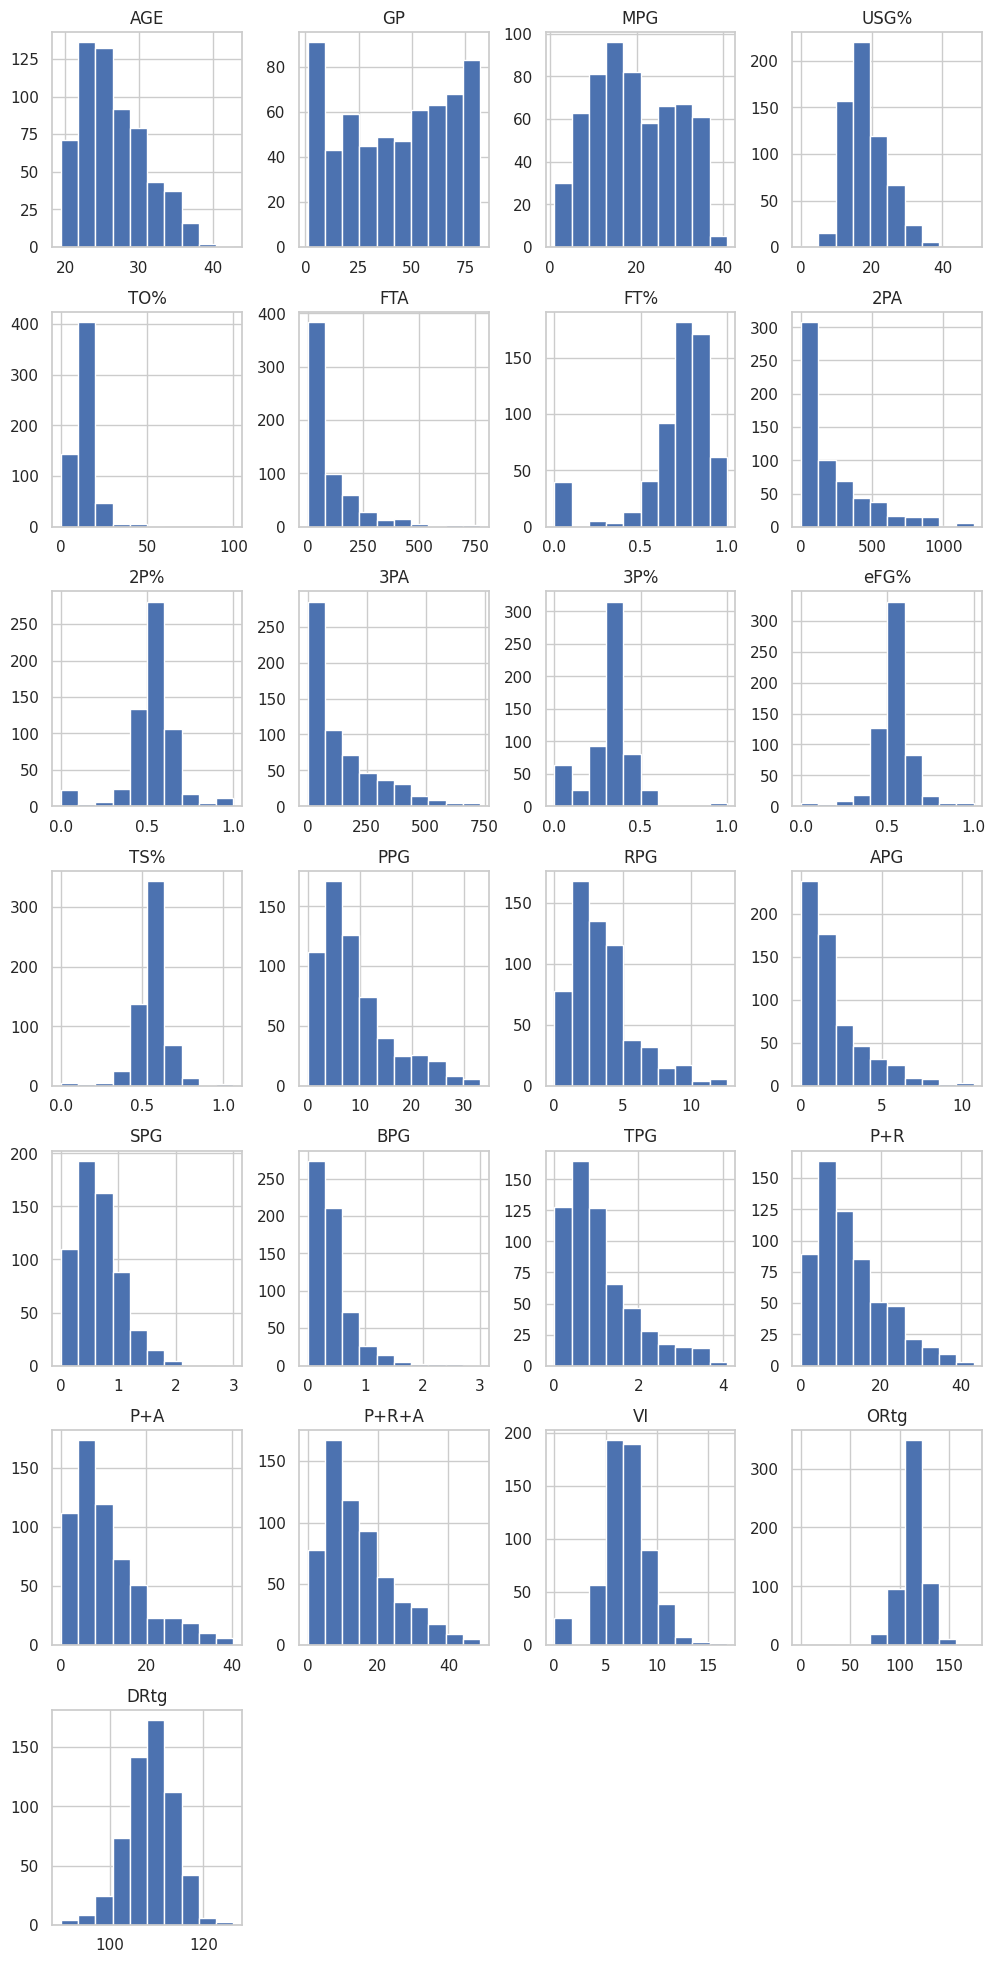

In [ ]:
#Here we want to check the distribution of our numerical columns
#This gives us more insights about how the data is skewed per column
columns = list(df)[:29]

df[columns].hist(figsize=(12,50),layout=(14,4))

plt.show()

<Axes: ylabel='frequency'>

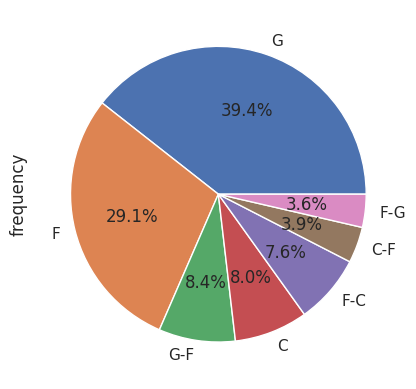

In [ ]:
#Now lets visualize the players position and see the most positions in the NBA and the least

df["POS"].value_counts().plot(kind='pie',ylabel='frequency',autopct='%1.1f%%')

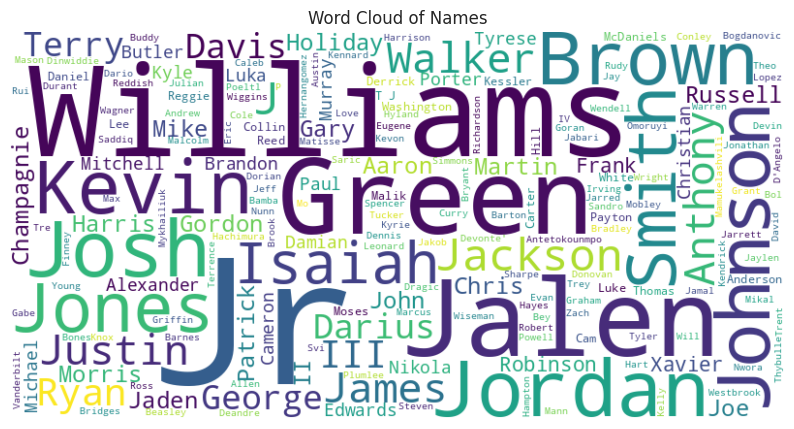

In [ ]:
#Now lets visualize the names of each of NBA player's
from wordcloud import WordCloud

# Combine all names into a single string
all_names = ' '.join(df['NAME'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_names)

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Names')
plt.axis('off')  # Turn off axis
plt.show()

<Axes: xlabel='TEAM', ylabel='Player Counts'>

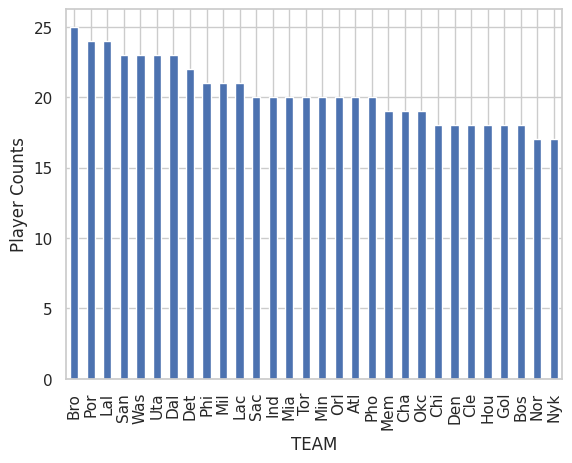

In [ ]:
#Now lets look at the count of player's per each team

df['TEAM'].value_counts().plot(kind='bar',ylabel='Player Counts')

In [ ]:
#Now lets look at the correlation between the variables in the dataset
df_numerical = df.select_dtypes(include=[np.number])
df_numerical.corr()

,AGE,GP,MPG,USG%,TO%,FTA,FT%,2PA,2P%,3PA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
AGE,1.000000,0.008373,0.146395,-0.026542,0.032272,0.027458,0.116159,0.001085,0.068025,0.082523,...,0.184190,0.084039,0.033594,0.093838,0.106933,0.130581,0.127300,0.122618,0.130927,-0.073008
GP,0.008373,1.000000,0.607682,0.132953,-0.066267,0.592347,0.367531,0.689780,0.177740,0.661496,...,0.332066,0.384600,0.308859,0.406605,0.522542,0.479008,0.511867,0.328507,0.284681,0.109805
MPG,0.146395,0.607682,1.000000,0.374265,-0.053069,0.694498,0.374115,0.760863,0.130240,0.698753,...,0.732349,0.719779,0.387760,0.781862,0.890455,0.885840,0.904474,0.525733,0.291007,0.285371
USG%,-0.026542,0.132953,0.374265,1.000000,-0.038000,0.580804,0.152352,0.562300,0.046283,0.415065,...,0.466236,0.206080,0.084773,0.629056,0.622564,0.670297,0.623549,0.498813,-0.059249,0.166517
TO%,0.032272,-0.066267,-0.053069,-0.038000,1.000000,-0.017243,-0.151364,-0.031732,-0.071707,-0.152399,...,0.089732,0.036315,0.021362,0.271213,-0.063352,-0.054816,-0.036830,0.084083,-0.200553,-0.277248
FTA,0.027458,0.592347,0.694498,0.580804,-0.017243,1.000000,0.244257,0.912277,0.108699,0.592053,...,0.576812,0.459569,0.351741,0.732854,0.839642,0.821215,0.830656,0.539853,0.230950,0.115035
FT%,0.116159,0.367531,0.374115,0.152352,-0.151364,0.244257,1.000000,0.263019,0.171101,0.351881,...,0.259017,0.225694,0.077771,0.251166,0.328187,0.347281,0.331044,0.342136,0.311693,0.238636
2PA,0.001085,0.689780,0.760863,0.562300,-0.031732,0.912277,0.263019,1.000000,0.116669,0.616253,...,0.607597,0.516298,0.389563,0.751532,0.862967,0.836360,0.856713,0.558151,0.212404,0.131549
2P%,0.068025,0.177740,0.130240,0.046283,-0.071707,0.108699,0.171101,0.116669,1.000000,0.005598,...,-0.005560,-0.009055,0.239866,0.066289,0.195402,0.122440,0.166137,0.202272,0.609230,-0.178509
3PA,0.082523,0.661496,0.698753,0.415065,-0.152399,0.592053,0.351881,0.616253,0.005598,1.000000,...,0.503484,0.461537,0.055004,0.544708,0.634872,0.689014,0.641324,0.296988,0.085519,0.328597


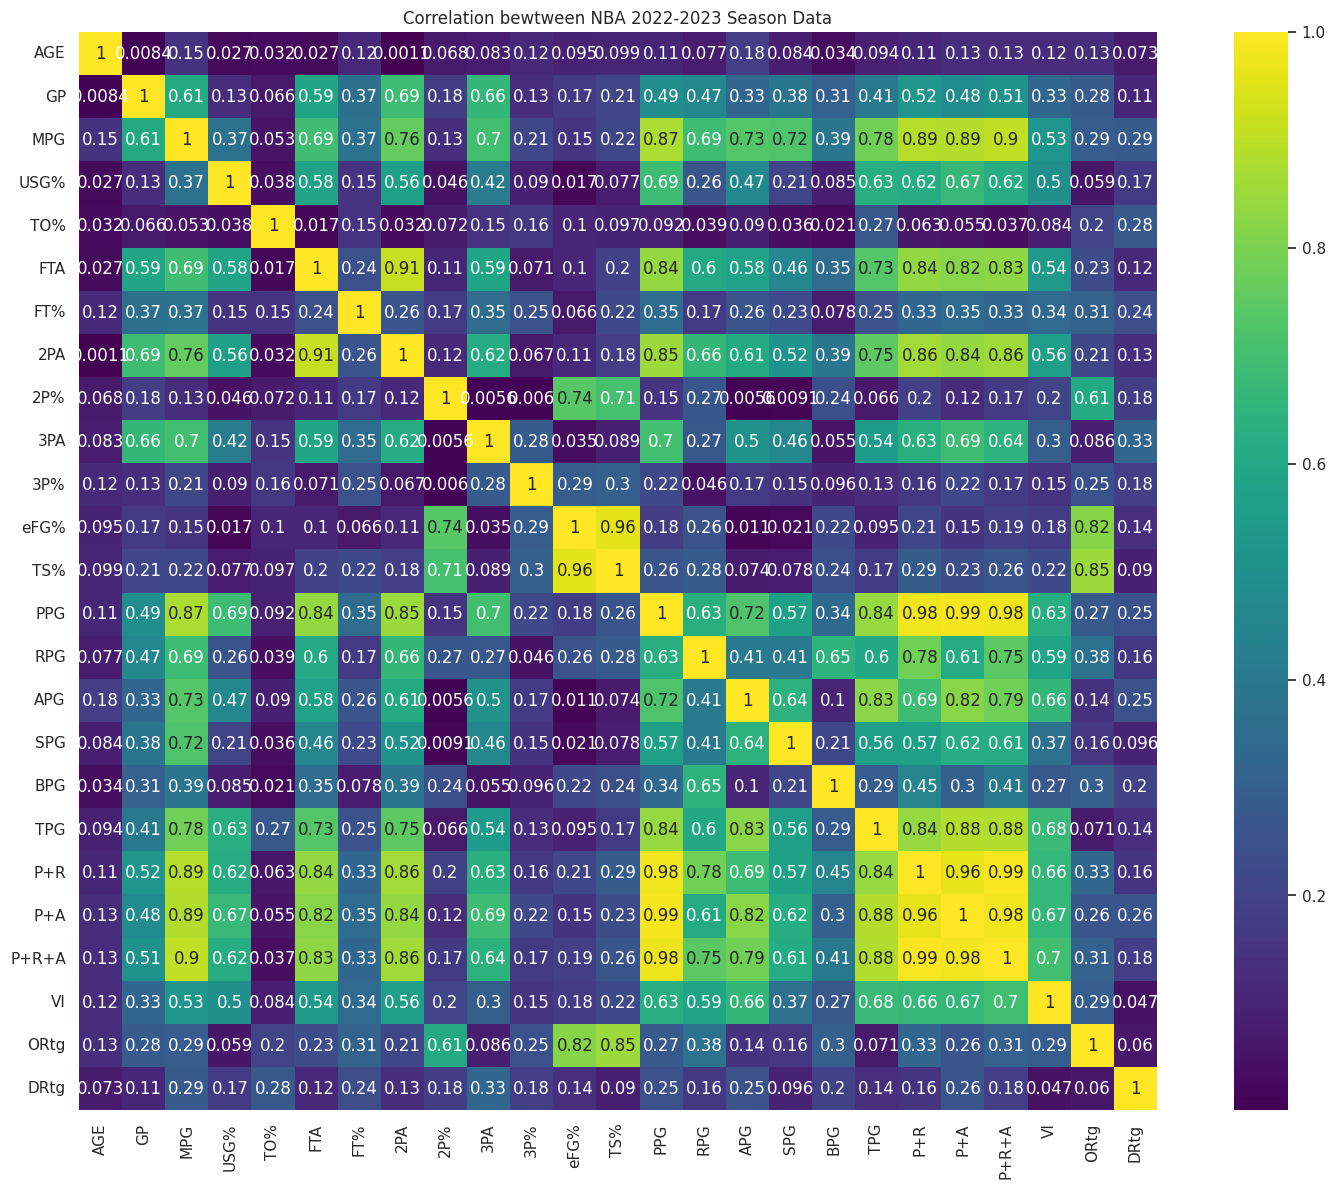

In [ ]:
#Now lets visualize this in a heatmap

plt.subplots(figsize=(20,14))

sns.heatmap(df_numerical.corr().abs(),vmax=1,square=True,annot=True,cmap='viridis')

plt.title("Correlation bewtween NBA 2022-2023 Season Data")

plt.show()

# **Further Visualization Research**
Based off the correlation between some fields and TS% I want to compare the two visually to further research the relationship

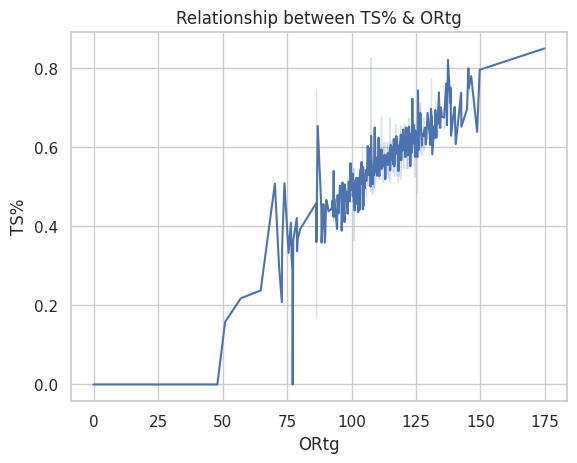

In [ ]:
#create a lineplt

sns.lineplot(data=df, x='ORtg', y='TS%')

# Add labels and title
plt.xlabel('ORtg')
plt.ylabel('TS%')
plt.title('Relationship between TS% & ORtg')

# Show the plot
plt.show()


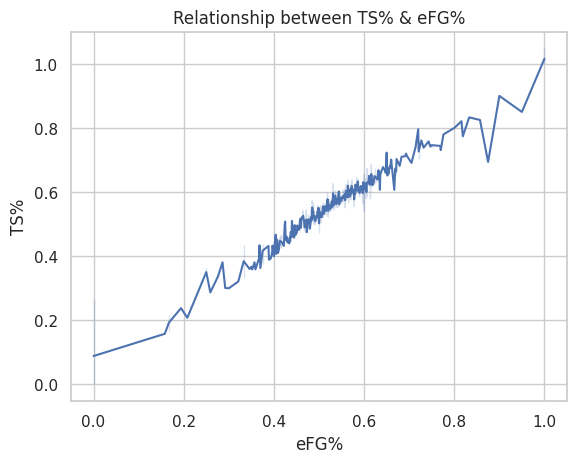

In [ ]:
#create a lineplt

sns.lineplot(data=df, x='eFG%', y='TS%')

# Add labels and title
plt.xlabel('eFG%')
plt.ylabel('TS%')
plt.title('Relationship between TS% & eFG%')

# Show the plot
plt.show()

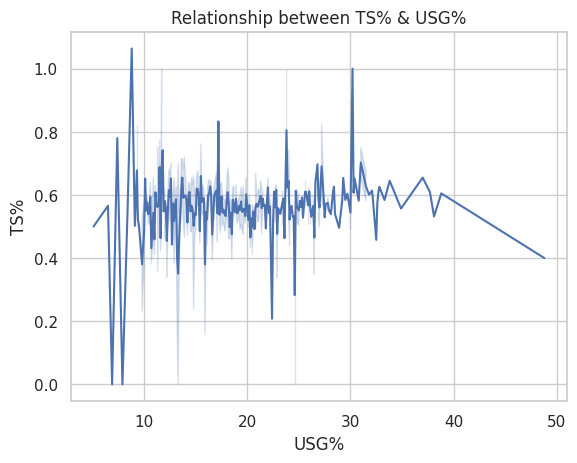

In [ ]:
#create a lineplt

sns.lineplot(data=df, x='USG%', y='TS%')

# Add labels and title
plt.xlabel('USG%')
plt.ylabel('TS%')
plt.title('Relationship between TS% & USG%')

# Show the plot
plt.show()

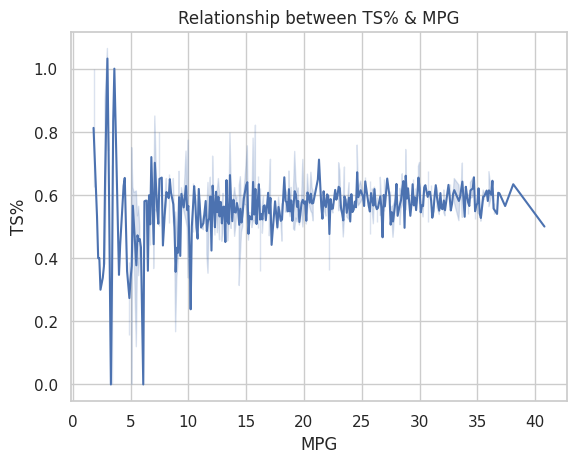

In [ ]:
#create a lineplt

sns.lineplot(data=df, x='MPG', y='TS%')

# Add labels and title
plt.xlabel('MPG')
plt.ylabel('TS%')
plt.title('Relationship between TS% & MPG')

# Show the plot
plt.show()

# **Data Preprocessing**

In [ ]:
#Check Data Types

df.dtypes

NAME      object
TEAM      object
POS       object
AGE      float64
GP         int64
MPG      float64
USG%     float64
TO%      float64
FTA        int64
FT%      float64
2PA        int64
2P%      float64
3PA        int64
3P%      float64
eFG%     float64
TS%      float64
PPG      float64
RPG      float64
APG      float64
SPG      float64
BPG      float64
TPG      float64
P+R      float64
P+A      float64
P+R+A    float64
VI       float64
ORtg     float64
DRtg     float64
dtype: object

In [ ]:
#Lets replace our Null values with zero in this case it will be okay, because 0 will be representing a record with no data.
#In the case of ORtg and DRtg, this is based off of 100 possesions, this mean a player was not able to get 100 possesions in the 2022-2023 season
df['ORtg'].fillna(0, inplace=True)
df['DRtg'].fillna(0, inplace=True)
df['TS%'].fillna(0, inplace=True)
df['eFG%'].fillna(0, inplace=True)
df['TO%'].fillna(0, inplace=True)


In [ ]:
# There are a couple Null values but we must see if we wan to keep them or replace and delete them moving forward

df.isnull().sum()

NAME     0
TEAM     0
POS      0
AGE      0
GP       0
MPG      0
USG%     0
TO%      0
FTA      0
FT%      0
2PA      0
2P%      0
3PA      0
3P%      0
eFG%     0
TS%      0
PPG      0
RPG      0
APG      0
SPG      0
BPG      0
TPG      0
P+R      0
P+A      0
P+R+A    0
VI       0
ORtg     0
DRtg     0
dtype: int64

# **Splitting X and y**

In [ ]:
X = df[['ORtg','USG%','MPG','eFG%']]
X

,ORtg,USG%,MPG,eFG%
0,124.4,37.0,34.6,0.573
1,120.0,37.7,36.2,0.560
2,126.4,33.8,36.3,0.564
3,124.9,32.8,35.5,0.531
4,116.8,38.8,32.1,0.571
...,...,...,...,...
604,0.0,0.0,1.0,0.000
605,48.0,24.6,5.1,0.000
606,0.0,16.7,5.3,0.000
607,0.0,7.9,5.5,0.000


In [ ]:
#Splitting y
#y is our prediction variable we want
#In this case we want to predict True Shooting Percentage for next seson

y = df['TS%']

y

0      0.655
1      0.609
2      0.645
3      0.626
4      0.605
       ...  
604    0.000
605    0.000
606    0.000
607    0.000
608    0.000
Name: TS%, Length: 609, dtype: float64

# **Train/Test/Split**

In [ ]:
#import train_test_split from scikit learn
from sklearn.model_selection import train_test_split

#Now we need to split out train & test data

X_train,X_test,y_train,y_test =train_test_split(X,y, train_size=0.20,random_state=42)

# **Data Model (Linear Regression)**

In [ ]:
#import Linear Refression model from scikit learn
from sklearn.linear_model import LinearRegression

In [ ]:
#Modeling
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Predictions
y_pred = lr.predict(X_test)

In [ ]:
#Adding Name Column to the testing dataset for post-processing

X_test_with_names = df.loc[X_test.index, ['NAME']].copy()


In [ ]:
#Adding  Team Name Column to the testing dataset for post-processing

X_test_with_team = df.loc[X_test.index, ['TEAM']].copy()

In [ ]:
 #Creating a DataFrame with player names and predicted TS% from the Linear regression model

 predictions_df = pd.DataFrame({'Player Name': X_test_with_names['NAME'],'Team':X_test_with_team['TEAM'], 'Predicted TS%':y_pred})


In [ ]:
predictions_df ['22_23_TS%'] = df.loc[X_test.index,'TS%'].values

In [ ]:
predictions_df ['PPG'] = df.loc[X_test.index, 'PPG']

In [ ]:
predictions_df ['MPG'] = df.loc[X_test.index, 'MPG']

In [ ]:
predictions_df['Predicted TS%'] = round(predictions_df['Predicted TS%'],ndigits=2)

In [ ]:
predictions_df['22_23_TS%'] = round(predictions_df['22_23_TS%'],ndigits=2)

In [ ]:
#Displaying DataFrame
predictions_df

,Player Name,Team,Predicted TS%,22_23_TS%,PPG,MPG
291,R.J. Hampton,Det,0.54,0.55,7.3,18.5
365,Dewayne Dedmon,Mia,0.57,0.58,5.7,11.7
467,Matt Ryan,Lal,0.47,0.46,3.9,10.8
567,JD Davison,Bos,0.50,0.48,1.6,5.5
118,Markelle Fultz,Orl,0.57,0.56,14.0,29.6
...,...,...,...,...,...,...
282,Josh Richardson,Nor,0.56,0.55,7.5,23.2
358,Jaylin Williams,Okc,0.56,0.56,5.9,18.7
397,John Konchar,Mem,0.55,0.54,5.1,20.7
254,Cam Reddish,Nyk,0.54,0.56,8.4,21.9


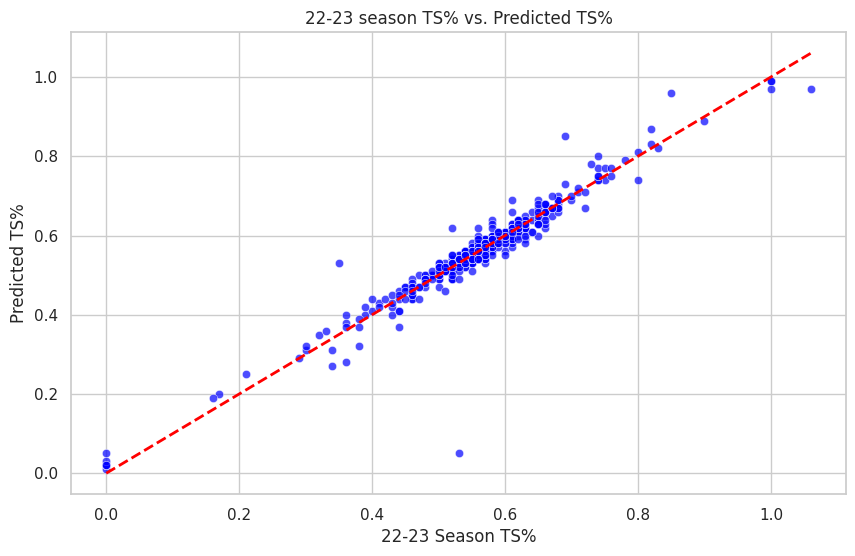

In [ ]:
#Create a scatter plot that shows the relationship with a best fit line between 22_23_TS% Vs Predicted TS%

sns.set(style="whitegrid")

#Scatter plot comparing previous season vs predicted seasons TS%
plt.figure(figsize=(10,6))
sns.scatterplot(x='22_23_TS%', y='Predicted TS%', data=predictions_df, color='blue',alpha= 0.7)

#Adding Line of best fit
plt.plot([min(predictions_df['22_23_TS%']), max(predictions_df['22_23_TS%'])],
         [min(predictions_df['22_23_TS%']), max(predictions_df['22_23_TS%'])],
         color='red', linestyle='--', linewidth=2)

plt.xlabel('22-23 Season TS%')
plt.ylabel('Predicted TS%')
plt.title('22-23 season TS% vs. Predicted TS%')

plt.show()



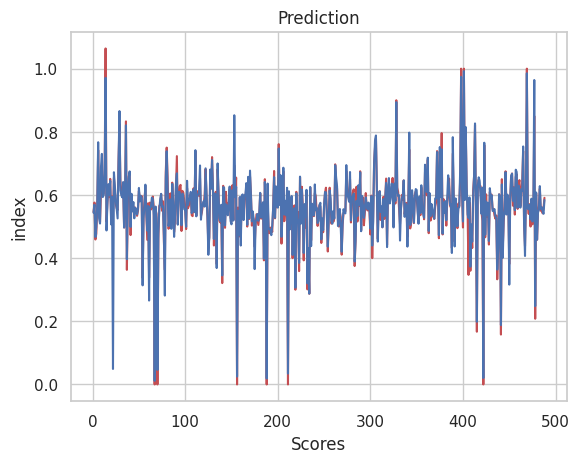

In [ ]:
#plot actual vs predicted
#Here we are comparing the test data set(Which is the correct data and labels) and the prediction dataset

c = [i for i in range (1,len(y_test)+1,1)]

plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction')
plt.ticklabel_format(axis="y", style="plain")
plt.show()

#Our prediction data is in blue
#Our historical or training set is in red

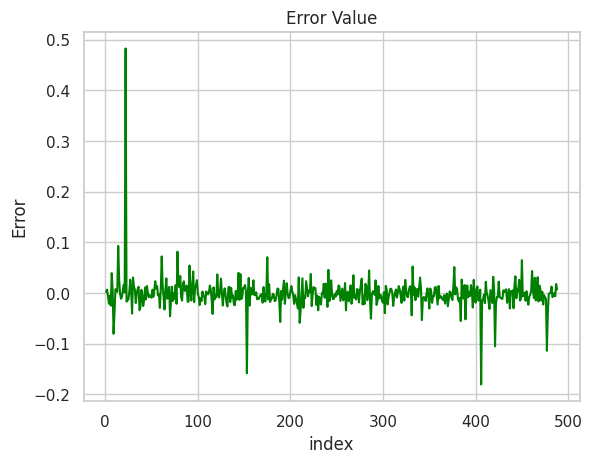

In [ ]:
#plotting the error
#Here we are plotting the errorr values that were in the predicted set
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.ticklabel_format(axis="y", style="plain")
plt.show()

In [ ]:
#Intercept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:', lr.coef_)

Intercept of the model: 0.011048905592667246
Coefficient of the line: [1.93599400e-04 9.83882537e-04 2.62372889e-04 9.50491767e-01]


In [ ]:
#Accuracy metrics from scikit learn
from sklearn import metrics
#MAE definition:is a measure of the average size of the mistakes in a collection of predictions, without taking their direction into account
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#MSE: measures how close a regression line is to a set of data points.
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#is one of the most commonly used measures for evaluating the quality of predictions. It shows how far predictions fall from measured true values
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r square :' , metrics.r2_score(y_test, y_pred))

#r-squared shows how well the data fit the regression model
#a good r-squared values is between 0.50 to 0.99
#This output is 0.92, which is amazing including if we account for MAE,MSE, and RMSE!
#But there is always room for improvement!

Mean Absolute Error: 0.01625540795328715
Mean Squared Error: 0.0010203426893591924
Root Mean Squared Error: 0.03194280340482332
r square : 0.9231495643285993


In [ ]:
#Now that we know our model is accurate, lets explore 1 more thing
#With out predicted values we want to see the player's that played under 25 min with High TS% and avg 10 pts or more
#This will be indicative to strategists in coaches in trades, rotations, and free agency
df_25min = predictions_df[(predictions_df['MPG'] <= 25) & (predictions_df['PPG']>=10)]

df_25min


,Player Name,Team,Predicted TS%,22_23_TS%,PPG,MPG
184,Svi Mykhailiuk,Cha,0.58,0.57,10.6,22.5
195,Doug McDermott,San,0.60,0.59,10.2,20.5
177,Sandro Mamukelashvili,San,0.55,0.55,10.8,23.3
148,Bones Hyland,Den,0.54,0.54,12.1,19.5
192,Cameron Payne,Pho,0.53,0.51,10.3,20.2
176,Bones Hyland,Lac,0.53,0.52,10.8,19.0
158,Naz Reid,Min,0.63,0.62,11.5,18.4
181,Talen Horton-Tucker,Uta,0.51,0.51,10.7,20.2
132,Rui Hachimura,Was,0.57,0.56,13.0,24.3
199,Brandon Clarke,Mem,0.68,0.68,10.0,19.5


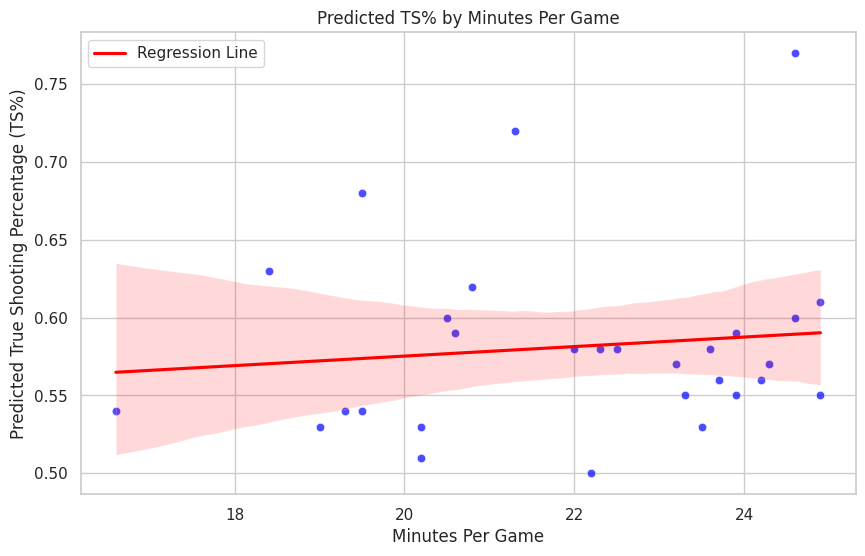

In [ ]:
#Now we want to create a scatter plot to see the relationship between Predicted TS% and Minutes Per Game
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='MPG', y='Predicted TS%', data=df_25min,color = 'blue', alpha=0.7)
sns.regplot(x='MPG', y='Predicted TS%', data=df_25min, scatter=False, color='red', label='Regression Line')

plt.xlabel('Minutes Per Game')
plt.ylabel('Predicted True Shooting Percentage (TS%)')
plt.title('Predicted TS% by Minutes Per Game')

plt.legend()
plt.show()

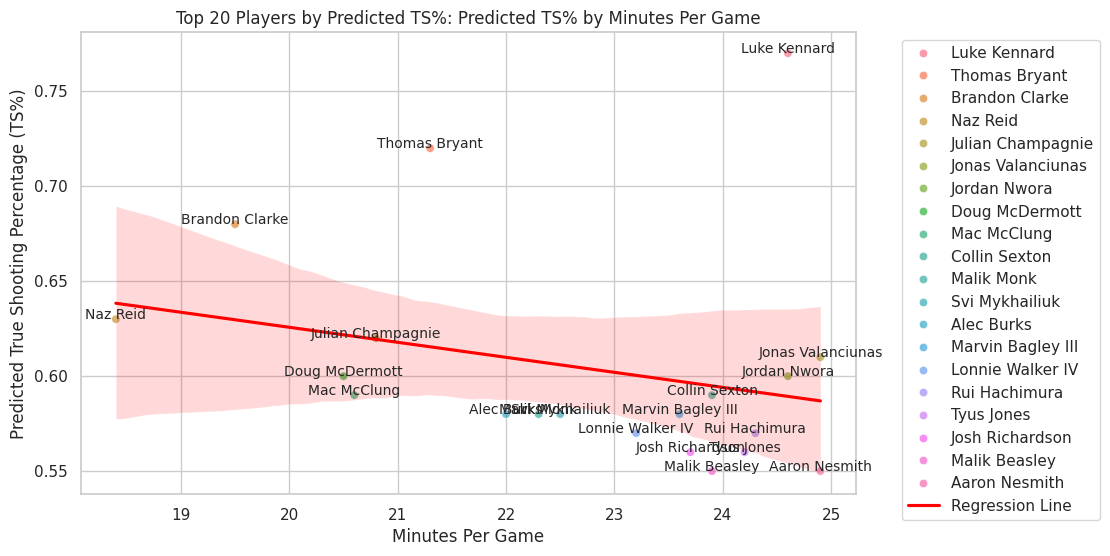

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Make a scatter plot with Predicted TS% vs. MPG with a regression line for the top 20 players
top_20_players = df_25min.sort_values(by='Predicted TS%', ascending=False).head(20)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='MPG', y='Predicted TS%', data=top_20_players, hue='Player Name', alpha=0.7)

#Add player names as text labels
for index, row in top_20_players.iterrows():
    plt.text(row['MPG'], row['Predicted TS%'], row['Player Name'], fontsize=10, ha='center', rotation='horizontal', va='baseline')

#regression line
sns.regplot(x='MPG', y='Predicted TS%', data=top_20_players, scatter=False, color='red', label='Regression Line')

plt.xlabel('Minutes Per Game')
plt.ylabel('Predicted True Shooting Percentage (TS%)')
plt.title('Top 20 Players by Predicted TS%: Predicted TS% by Minutes Per Game')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',)

plt.show()

In [ ]:
#Now we that there are some player's that really stick out in this category
#Based off of this model and analysis
#If I was a team wanting to fill my roster with effiecient offensive player's
#I would choose from the list below
top_20_players

,Player Name,Team,Predicted TS%,22_23_TS%,PPG,MPG
164,Luke Kennard,Mem,0.77,0.76,11.3,24.6
147,Thomas Bryant,Lal,0.72,0.71,12.1,21.3
199,Brandon Clarke,Mem,0.68,0.68,10.0,19.5
158,Naz Reid,Min,0.63,0.62,11.5,18.4
170,Julian Champagnie,San,0.62,0.61,11.0,20.8
114,Jonas Valanciunas,Nor,0.61,0.61,14.1,24.9
133,Jordan Nwora,Ind,0.60,0.59,13.0,24.6
195,Doug McDermott,San,0.60,0.59,10.2,20.5
143,Mac McClung,Phi,0.59,0.56,12.5,20.6
112,Collin Sexton,Uta,0.59,0.62,14.3,23.9


# **Data Model 2 (Decision Tree)**

In [ ]:
#From the dataset, get the features that you want to use including target variable
df2 = df[['NAME','ORtg','USG%','MPG','eFG%','PPG','TS%','TEAM']].copy()
df2

,NAME,ORtg,USG%,MPG,eFG%,PPG,TS%,TEAM
0,Joel Embiid,124.4,37.0,34.6,0.573,33.1,0.655,Phi
1,Luka Doncic,120.0,37.7,36.2,0.560,32.4,0.609,Dal
2,Damian Lillard,126.4,33.8,36.3,0.564,32.2,0.645,Por
3,Shai Gilgeous-Alexander,124.9,32.8,35.5,0.531,31.4,0.626,Okc
4,Giannis Antetokounmpo,116.8,38.8,32.1,0.571,31.1,0.605,Mil
...,...,...,...,...,...,...,...,...
604,Michael Foster Jr.,0.0,0.0,1.0,0.000,0.0,0.000,Phi
605,Frank Jackson,48.0,24.6,5.1,0.000,0.0,0.000,Uta
606,Alondes Williams,0.0,16.7,5.3,0.000,0.0,0.000,Bro
607,Jamaree Bouyea,0.0,7.9,5.5,0.000,0.0,0.000,Was


# **Split X and Y**

In [ ]:
#Splitting X and Y

X = df2.drop(['NAME','TS%','TEAM'], axis =1)
X

,ORtg,USG%,MPG,eFG%,PPG
0,124.4,37.0,34.6,0.573,33.1
1,120.0,37.7,36.2,0.560,32.4
2,126.4,33.8,36.3,0.564,32.2
3,124.9,32.8,35.5,0.531,31.4
4,116.8,38.8,32.1,0.571,31.1
...,...,...,...,...,...
604,0.0,0.0,1.0,0.000,0.0
605,48.0,24.6,5.1,0.000,0.0
606,0.0,16.7,5.3,0.000,0.0
607,0.0,7.9,5.5,0.000,0.0


In [ ]:
#Target Variable

y = df2['TS%']

y

0      0.655
1      0.609
2      0.645
3      0.626
4      0.605
       ...  
604    0.000
605    0.000
606    0.000
607    0.000
608    0.000
Name: TS%, Length: 609, dtype: float64

In [ ]:
#Train_Test_Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Training**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
#Initalize the decision tree regressor

tree_reg = DecisionTreeRegressor(random_state=42)

tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

# **Evaluation**

In [ ]:
#Making the predictions on the testing data

y_pred = tree_reg.predict(X_test)

In [ ]:
#evaluate the model with the mean squared error method

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 0.0029963114754098354


In [ ]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.7781802823986427


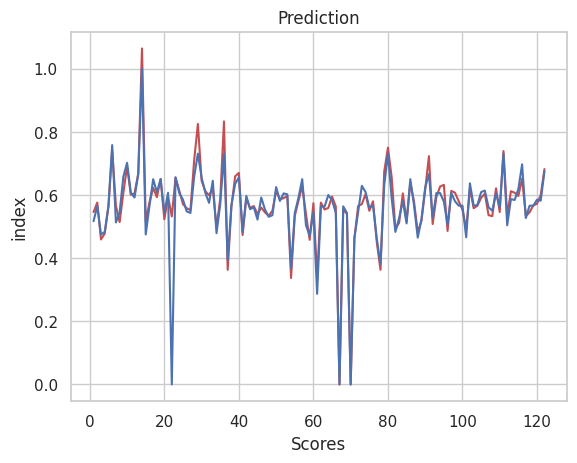

In [ ]:
#plot actual vs predicted
#Here we are comparing the test data set(Which is the correct data and labels) and the prediction dataset

c = [i for i in range (1,len(y_test)+1,1)]

plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction')
plt.ticklabel_format(axis="y", style="plain")
plt.show()

#Our prediction data is in blue
#Our historical or training set is in red

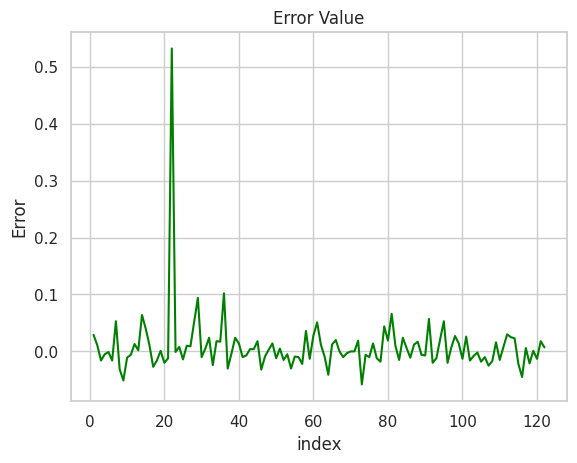

In [ ]:
#plotting the error
#Here we are plotting the errorr values that were in the predicted set
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.ticklabel_format(axis="y", style="plain")
plt.show()

In [ ]:
#Adding Name Column to the testing dataset for post-processing
X_test_with_names_2 = df2.loc[X_test.index, ['NAME']].copy()

In [ ]:
#Adding  Team Name Column to the testing dataset for post-processing

X_test_with_team2 = df2.loc[X_test.index, ['TEAM']].copy()

In [ ]:
#Creating a DataFrame with player names and predicted TS% for the Decision Tree model
predictions_df2 = pd.DataFrame({'Player Name': X_test_with_names_2['NAME'],'Team':X_test_with_team2['TEAM'], 'Predicted TS%':y_pred})

In [ ]:
predictions_df2 ['22_23_TS%'] = df2.loc[X_test.index,'TS%'].values

In [ ]:
predictions_df2 ['PPG'] = df2.loc[X_test.index, 'PPG']

In [ ]:
predictions_df2 ['MPG'] = df2.loc[X_test.index, 'MPG']

In [ ]:
predictions_df2['Predicted TS%'] = round(predictions_df2['Predicted TS%'],ndigits=2)

In [ ]:
predictions_df2['22_23_TS%'] = round(predictions_df2['22_23_TS%'],ndigits=2)

In [ ]:
#Displaying DataFrame for decision tree predictions
predictions_df2
#We can see that there is definitley a difference

,Player Name,Team,Predicted TS%,22_23_TS%,PPG,MPG
291,R.J. Hampton,Det,0.52,0.55,7.3,18.5
365,Dewayne Dedmon,Mia,0.56,0.58,5.7,11.7
467,Matt Ryan,Lal,0.48,0.46,3.9,10.8
567,JD Davison,Bos,0.48,0.48,1.6,5.5
118,Markelle Fultz,Orl,0.56,0.56,14.0,29.6
...,...,...,...,...,...,...
375,Davion Mitchell,Sac,0.57,0.55,5.6,18.1
249,Ayo Dosunmu,Chi,0.57,0.57,8.6,26.2
209,Coby White,Chi,0.58,0.57,9.7,23.4
531,Damian Jones,Lal,0.58,0.60,2.5,8.0


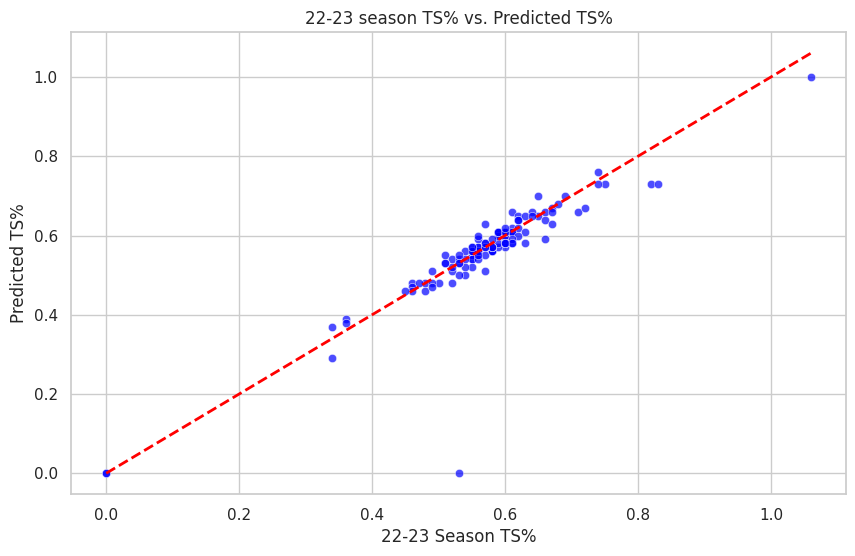

In [ ]:
#Create a scatter plot that shows the relationship with a best fit line between 22_23_TS% Vs Predicted TS%

sns.set(style="whitegrid")

#Scatter plot comparing previous season vs predicted seasons TS%
plt.figure(figsize=(10,6))
sns.scatterplot(x='22_23_TS%', y='Predicted TS%', data=predictions_df2, color='blue',alpha= 0.7)

#Adding Line of best fit
plt.plot([min(predictions_df2['22_23_TS%']), max(predictions_df2['22_23_TS%'])],
         [min(predictions_df2['22_23_TS%']), max(predictions_df2['22_23_TS%'])],
         color='red', linestyle='--', linewidth=2)

plt.xlabel('22-23 Season TS%')
plt.ylabel('Predicted TS%')
plt.title('22-23 season TS% vs. Predicted TS%')

plt.show()

In [ ]:
#We will check the same data as we did for the linear regression to see if our prospects changed
df_25min_2 = predictions_df2[(predictions_df2['MPG'] <= 25) & (predictions_df2['PPG']>=10)]

df_25min_2

,Player Name,Team,Predicted TS%,22_23_TS%,PPG,MPG
184,Svi Mykhailiuk,Cha,0.58,0.57,10.6,22.5
195,Doug McDermott,San,0.60,0.59,10.2,20.5
177,Sandro Mamukelashvili,San,0.55,0.55,10.8,23.3
148,Bones Hyland,Den,0.50,0.54,12.1,19.5
192,Cameron Payne,Pho,0.53,0.51,10.3,20.2
176,Bones Hyland,Lac,0.52,0.52,10.8,19.0
158,Naz Reid,Min,0.62,0.62,11.5,18.4
181,Talen Horton-Tucker,Uta,0.53,0.51,10.7,20.2
132,Rui Hachimura,Was,0.57,0.56,13.0,24.3
199,Brandon Clarke,Mem,0.68,0.68,10.0,19.5


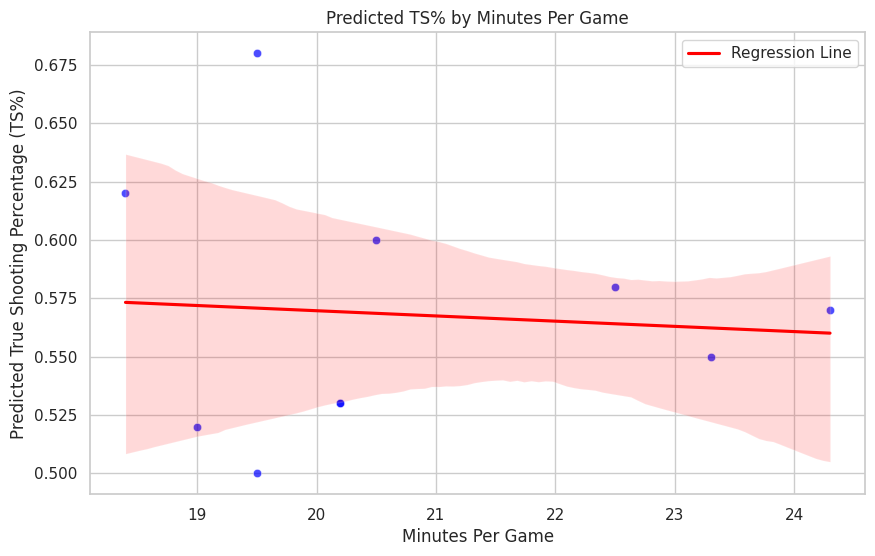

In [ ]:
#Now we want to create a scatter plot to see the relationship between Predicted TS% and Minutes Per Game
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='MPG', y='Predicted TS%', data=df_25min_2,color = 'blue', alpha=0.7)
sns.regplot(x='MPG', y='Predicted TS%', data=df_25min_2, scatter=False, color='red', label='Regression Line')

plt.xlabel('Minutes Per Game')
plt.ylabel('Predicted True Shooting Percentage (TS%)')
plt.title('Predicted TS% by Minutes Per Game')

plt.legend()
plt.show()

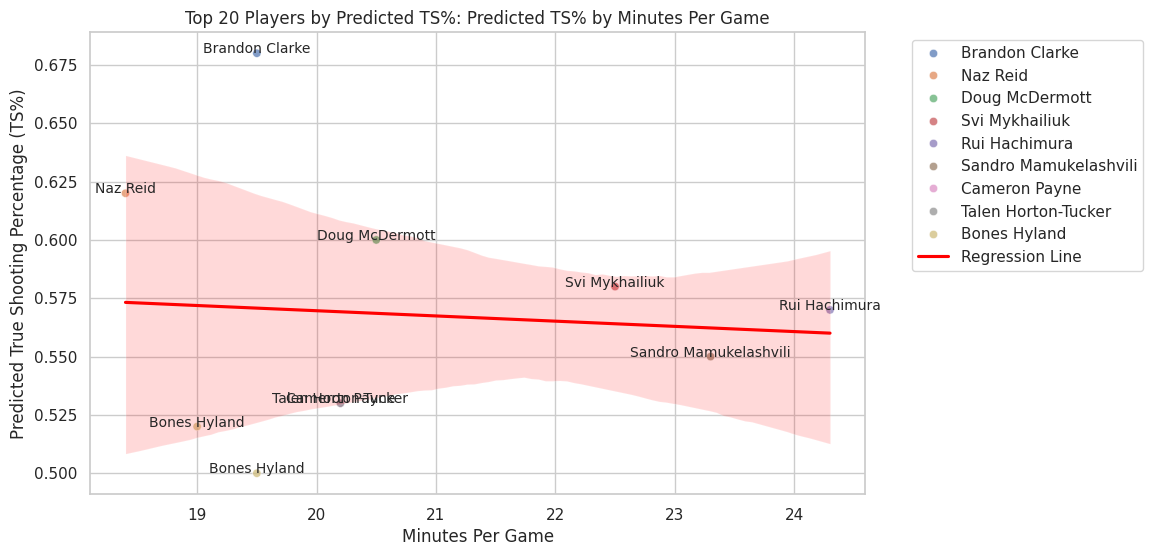

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Make a scatter plot with Predicted TS% vs. MPG with a regression line for the top 20 players
top_20_players = df_25min_2.sort_values(by='Predicted TS%', ascending=False).head(20)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='MPG', y='Predicted TS%', data=top_20_players, hue='Player Name', alpha=0.7)

#Add player names as text labels
for index, row in top_20_players.iterrows():
    plt.text(row['MPG'], row['Predicted TS%'], row['Player Name'], fontsize=10, ha='center', rotation='horizontal', va='baseline')

#regression line
sns.regplot(x='MPG', y='Predicted TS%', data=top_20_players, scatter=False, color='red', label='Regression Line')

plt.xlabel('Minutes Per Game')
plt.ylabel('Predicted True Shooting Percentage (TS%)')
plt.title('Top 20 Players by Predicted TS%: Predicted TS% by Minutes Per Game')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',)

plt.show()

In [ ]:
#We can notice that with this different test set it still had some of our same top prospects as in the linear regression model
top_20_players

,Player Name,Team,Predicted TS%,22_23_TS%,PPG,MPG
199,Brandon Clarke,Mem,0.68,0.68,10.0,19.5
158,Naz Reid,Min,0.62,0.62,11.5,18.4
195,Doug McDermott,San,0.60,0.59,10.2,20.5
184,Svi Mykhailiuk,Cha,0.58,0.57,10.6,22.5
132,Rui Hachimura,Was,0.57,0.56,13.0,24.3
177,Sandro Mamukelashvili,San,0.55,0.55,10.8,23.3
192,Cameron Payne,Pho,0.53,0.51,10.3,20.2
181,Talen Horton-Tucker,Uta,0.53,0.51,10.7,20.2
176,Bones Hyland,Lac,0.52,0.52,10.8,19.0
148,Bones Hyland,Den,0.50,0.54,12.1,19.5
